# Fetch and plot data from multiple runs in the VIEWS API
## Example for Kenya runs from 2023

This notebook allows users to fetch and download large data from the VIEWS API, uninhibited by the API's page limit. 

**No certificates/special access tokens are required.**

In [1]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [2]:
import os
home = os.path.expanduser("~")

## Define the dataset of interest

Please consult https://github.com/prio-data/views_api for guidance. 

In [3]:
# Define the URL you want to fetch data from. Please consult https://github.com/prio-data/views_api to learn more about filtering out the data of interest and creating the corresponding URL. 

VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_01_t01/cm/sb/sc_cm_sb_main?iso=KEN'

## Static functions

No need to edit this section. 

In [4]:
# Request function
r = requests.get(VIEWS_URL)

In [5]:
#The set page size 
PAGE_SIZE=1000

In [6]:
#Define the full request 
req_url=VIEWS_URL #+'/'+str()+'?'+'pagesize='+str(PAGE_SIZE)
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

In [7]:
list(page_data)

['next_page',
 'prev_page',
 'model_tree',
 'models',
 'row_count',
 'page_count',
 'page_cur',
 'start_date',
 'end_date',
 'data']

In [8]:
# The loop to keep fetching pages until all data is accessed 

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df=pd.DataFrame(master_list)

## Inspect the data

In [9]:
# Inspect the data to see that it looks correct

df

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,237,518,Kenya,501,KEN,2023,2,1.7932
1,237,519,Kenya,501,KEN,2023,3,1.8678
2,237,520,Kenya,501,KEN,2023,4,2.0065
3,237,521,Kenya,501,KEN,2023,5,1.9152
4,237,522,Kenya,501,KEN,2023,6,2.0726
5,237,523,Kenya,501,KEN,2023,7,1.8848
6,237,524,Kenya,501,KEN,2023,8,1.8566
7,237,525,Kenya,501,KEN,2023,9,1.6828
8,237,526,Kenya,501,KEN,2023,10,1.5296
9,237,527,Kenya,501,KEN,2023,11,1.5665


In [10]:
df['pred_2023_01'] = np.exp(df['sc_cm_sb_main'])-1
df['Date'] = df['year'].astype(str) +'-'+ df['month'].astype(str)

In [11]:
df

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,pred_2023_01,Date
0,237,518,Kenya,501,KEN,2023,2,1.7932,5.008649,2023-2
1,237,519,Kenya,501,KEN,2023,3,1.8678,5.474038,2023-3
2,237,520,Kenya,501,KEN,2023,4,2.0065,6.437241,2023-4
3,237,521,Kenya,501,KEN,2023,5,1.9152,5.788296,2023-5
4,237,522,Kenya,501,KEN,2023,6,2.0726,6.945454,2023-6
5,237,523,Kenya,501,KEN,2023,7,1.8848,5.585037,2023-7
6,237,524,Kenya,501,KEN,2023,8,1.8566,5.401933,2023-8
7,237,525,Kenya,501,KEN,2023,9,1.6828,4.380601,2023-9
8,237,526,Kenya,501,KEN,2023,10,1.5296,3.616330,2023-10
9,237,527,Kenya,501,KEN,2023,11,1.5665,3.789854,2023-11


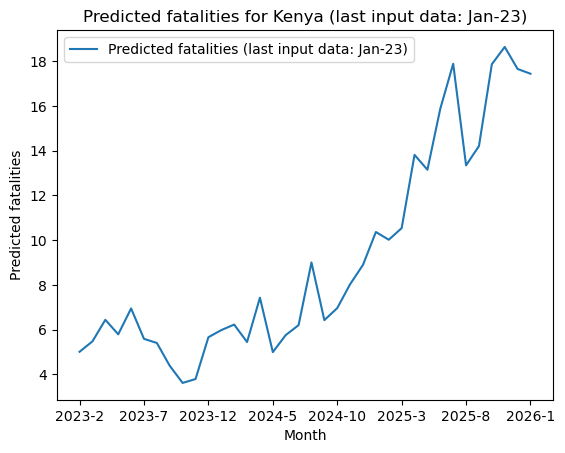

In [14]:
# Create the line graph
df.plot(y='pred_2023_01', x='Date', label="Predicted fatalities (last input data: Jan-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: Jan-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.savefig('Jan23.png')
plt.show()

In [15]:
VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_02_t01/cm/sb/sc_cm_sb_main?iso=KEN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df2=pd.DataFrame(master_list)

In [16]:
df2

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main
0,237,519,Kenya,501,KEN,2023,3,1.6150
1,237,520,Kenya,501,KEN,2023,4,1.6601
2,237,521,Kenya,501,KEN,2023,5,1.7831
3,237,522,Kenya,501,KEN,2023,6,1.9448
4,237,523,Kenya,501,KEN,2023,7,2.0018
5,237,524,Kenya,501,KEN,2023,8,1.6260
6,237,525,Kenya,501,KEN,2023,9,1.5686
7,237,526,Kenya,501,KEN,2023,10,1.5294
8,237,527,Kenya,501,KEN,2023,11,1.7705
9,237,528,Kenya,501,KEN,2023,12,1.8590


In [17]:
df2['pred_2023_02'] = np.exp(df2['sc_cm_sb_main'])-1
df2['Date'] = df2['year'].astype(str) +'-'+ df2['month'].astype(str)

In [18]:
df2

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,pred_2023_02,Date
0,237,519,Kenya,501,KEN,2023,3,1.6150,4.027888,2023-3
1,237,520,Kenya,501,KEN,2023,4,1.6601,4.259837,2023-4
2,237,521,Kenya,501,KEN,2023,5,1.7831,4.948267,2023-5
3,237,522,Kenya,501,KEN,2023,6,1.9448,5.992233,2023-6
4,237,523,Kenya,501,KEN,2023,7,2.0018,6.402368,2023-7
5,237,524,Kenya,501,KEN,2023,8,1.6260,4.083500,2023-8
6,237,525,Kenya,501,KEN,2023,9,1.5686,3.799924,2023-9
7,237,526,Kenya,501,KEN,2023,10,1.5294,3.615407,2023-10
8,237,527,Kenya,501,KEN,2023,11,1.7705,4.873790,2023-11
9,237,528,Kenya,501,KEN,2023,12,1.8590,5.417316,2023-12


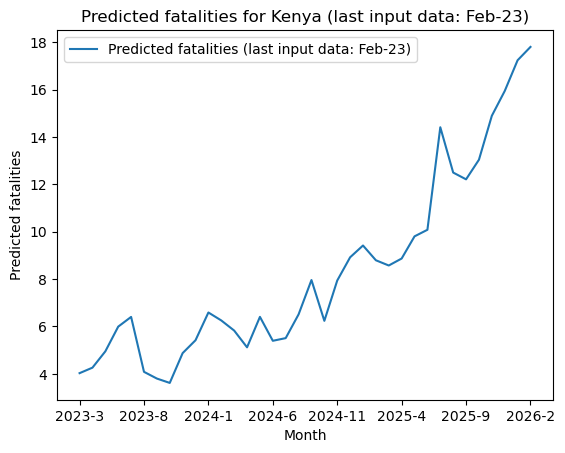

In [19]:
# Create the line graph
df2.plot(y='pred_2023_02', x='Date', label="Predicted fatalities (last input data: Feb-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: Feb-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.savefig('Feb23.png')
plt.show()

In [20]:
VIEWS_URL='https://api.viewsforecasting.org/fatalities001_2023_03_t01/cm/sb/sc_cm_sb_main?iso=KEN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df3=pd.DataFrame(master_list)

df3['pred_2023_03'] = np.exp(df3['sc_cm_sb_main'])-1
df3['Date'] = df3['year'].astype(str) +'-'+ df3['month'].astype(str)

df3

,country_id,month_id,name,gwcode,isoab,year,month,sc_cm_sb_main,pred_2023_03,Date
0,237,520,Kenya,501,KEN,2023,4,0.8504,1.340583,2023-4
1,237,521,Kenya,501,KEN,2023,5,0.9970,1.710139,2023-5
2,237,522,Kenya,501,KEN,2023,6,1.3602,2.896973,2023-6
3,237,523,Kenya,501,KEN,2023,7,1.4409,3.224496,2023-7
4,237,524,Kenya,501,KEN,2023,8,1.2902,2.633513,2023-8
5,237,525,Kenya,501,KEN,2023,9,1.1239,2.076830,2023-9
6,237,526,Kenya,501,KEN,2023,10,1.3038,2.683267,2023-10
7,237,527,Kenya,501,KEN,2023,11,1.3620,2.903993,2023-11
8,237,528,Kenya,501,KEN,2023,12,1.6853,4.394069,2023-12
9,237,529,Kenya,501,KEN,2024,1,1.5261,3.600201,2024-1


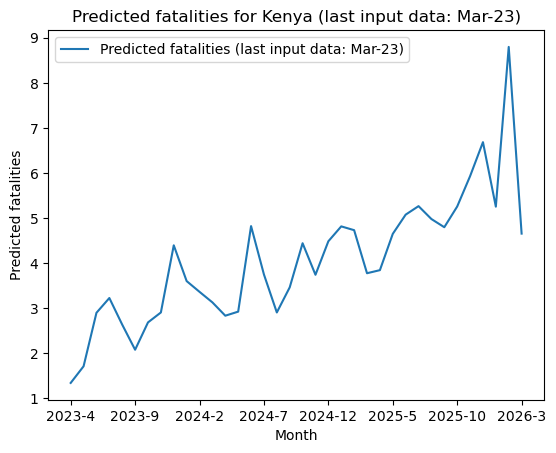

In [21]:
# Create the line graph
df3.plot(y='pred_2023_03', x='Date', label="Predicted fatalities (last input data: Mar-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: Mar-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.savefig('Mar23.png')
plt.show()


In [22]:
VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_04_t01/cm/sb/main_mean?iso=KEN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df4=pd.DataFrame(master_list)

df4['Date'] = df4['year'].astype(str) +'-'+ df4['month'].astype(str)

df4

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,Date
0,237,521,Kenya,501,KEN,2023,5,1.1682,2023-5
1,237,522,Kenya,501,KEN,2023,6,1.9524,2023-6
2,237,523,Kenya,501,KEN,2023,7,2.0152,2023-7
3,237,524,Kenya,501,KEN,2023,8,1.6447,2023-8
4,237,525,Kenya,501,KEN,2023,9,1.6433,2023-9
5,237,526,Kenya,501,KEN,2023,10,1.5462,2023-10
6,237,527,Kenya,501,KEN,2023,11,2.0951,2023-11
7,237,528,Kenya,501,KEN,2023,12,2.2021,2023-12
8,237,529,Kenya,501,KEN,2024,1,2.5500,2024-1
9,237,530,Kenya,501,KEN,2024,2,2.2795,2024-2


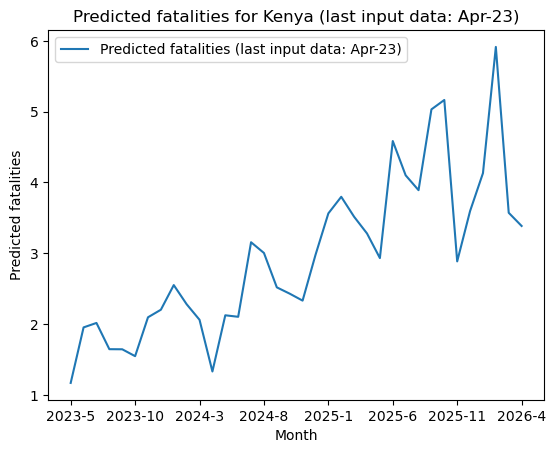

In [23]:
# Create the line graph
df4.plot(y='main_mean', x='Date', label="Predicted fatalities (last input data: Apr-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: Apr-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.savefig('Apr23.png')
plt.show()

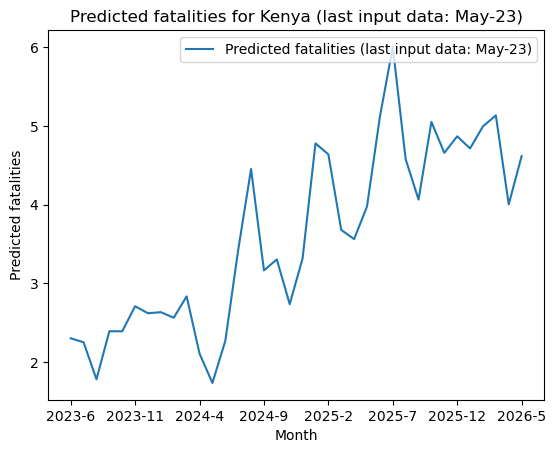

In [24]:
VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_05_t01/cm/sb/main_mean?iso=KEN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df5=pd.DataFrame(master_list)

df5['Date'] = df5['year'].astype(str) +'-'+ df5['month'].astype(str)

# Create the line graph
df5.plot(y='main_mean', x='Date', label="Predicted fatalities (last input data: May-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: May-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.savefig('May23.png')
plt.show()

In [25]:
VIEWS_URL='https://api.viewsforecasting.org/fatalities002_2023_06_t01/cm/sb/main_mean?iso=KEN'

r = requests.get(VIEWS_URL)
PAGE_SIZE=1000
req_url=VIEWS_URL 
    
master_list=[]
r=requests.get(req_url)
page_data=r.json()

list(page_data)

master_list+=page_data['data']
    
while page_data['next_page'] != '':
    r=requests.get(page_data['next_page'])
    page_data=r.json()

    master_list+=page_data['data']
        
df6=pd.DataFrame(master_list)

df6['Date'] = df6['year'].astype(str) +'-'+ df6['month'].astype(str)


df6

,country_id,month_id,name,gwcode,isoab,year,month,main_mean,Date
0,237,523,Kenya,501,KEN,2023,7,4.0509,2023-7
1,237,524,Kenya,501,KEN,2023,8,3.5898,2023-8
2,237,525,Kenya,501,KEN,2023,9,3.4317,2023-9
3,237,526,Kenya,501,KEN,2023,10,3.3761,2023-10
4,237,527,Kenya,501,KEN,2023,11,5.2607,2023-11
5,237,528,Kenya,501,KEN,2023,12,4.9422,2023-12
6,237,529,Kenya,501,KEN,2024,1,4.1190,2024-1
7,237,530,Kenya,501,KEN,2024,2,3.8676,2024-2
8,237,531,Kenya,501,KEN,2024,3,3.7001,2024-3
9,237,532,Kenya,501,KEN,2024,4,4.2940,2024-4


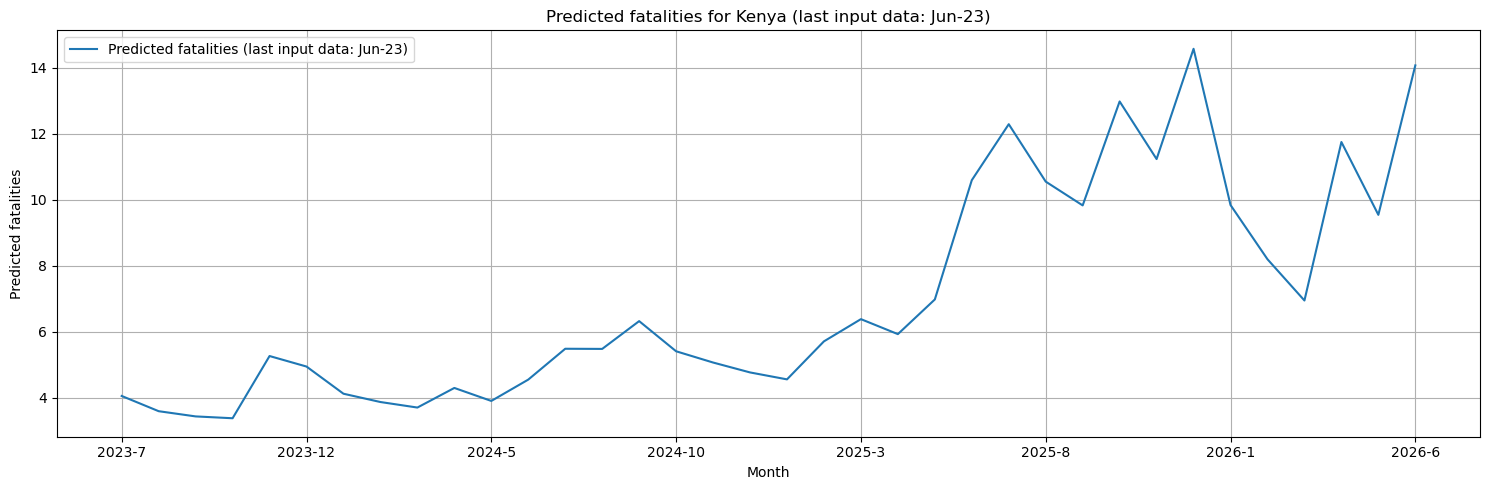

In [32]:
df6['Date'] = df6['year'].astype(str) +'-'+ df6['month'].astype(str)

# Create the line graph
df6.plot(y='main_mean', x='Date', label="Predicted fatalities (last input data: Jun-23)")

# Customize the graph
plt.title("Predicted fatalities for Kenya (last input data: Jun-23)")
plt.xlabel("Month")
plt.ylabel("Predicted fatalities")

plt.grid()
plt.tight_layout()


# Display the graph

plt.savefig('Jun23.png')
plt.show()


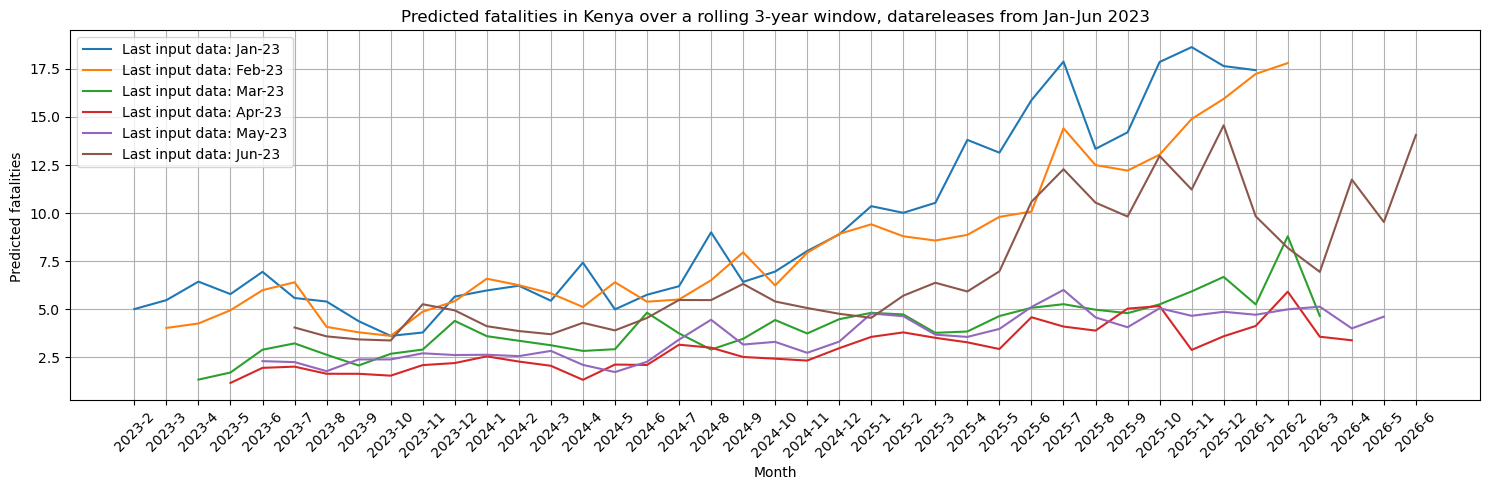

In [30]:
# Create the line graphs for each data frame
plt.plot(df['Date'], df['pred_2023_01'], label='Last input data: Jan-23')
plt.plot(df2['Date'], df2['pred_2023_02'], label='Last input data: Feb-23')
plt.plot(df3['Date'], df3['pred_2023_03'], label='Last input data: Mar-23')
plt.plot(df4['Date'], df4['main_mean'], label='Last input data: Apr-23')
plt.plot(df5['Date'], df5['main_mean'], label='Last input data: May-23')
plt.plot(df6['Date'], df6['main_mean'], label='Last input data: Jun-23')

#set_figwidth()
plt.rcParams["figure.figsize"] = (15, 5)


# Customize the graph
plt.title("Predicted fatalities in Kenya over a rolling 3-year window, datareleases from Jan-Jun 2023")
plt.xlabel("Month")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities ")

# Show the legend
plt.legend()

# Adjust the layout

plt.grid()

plt.tight_layout()

plt.savefig('Jan-Jun23.png')
plt.show()


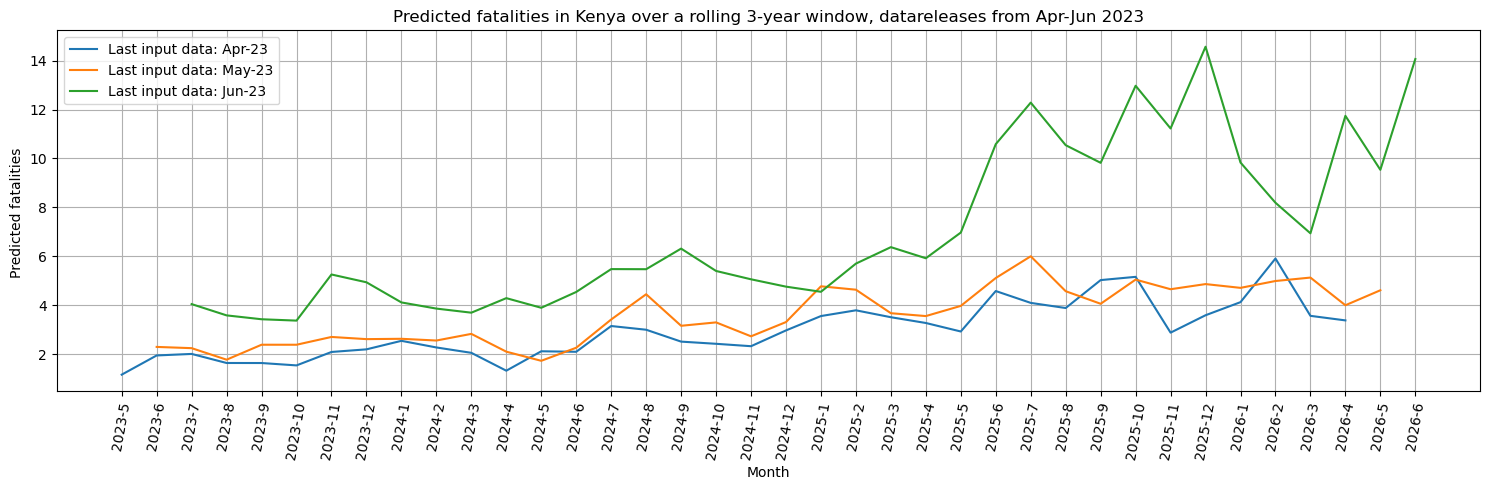

In [29]:


#set_figwidth()
plt.rcParams["figure.figsize"] = (15, 5)


# Create the line graphs for each data frame
plt.plot(df4['Date'], df4['main_mean'], label='Last input data: Apr-23')
plt.plot(df5['Date'], df5['main_mean'], label='Last input data: May-23')
plt.plot(df6['Date'], df6['main_mean'], label='Last input data: Jun-23')


# Customize the graph
plt.title("Predicted fatalities in Kenya over a rolling 3-year window, datareleases from Apr-Jun 2023")
plt.xlabel("Month")
plt.xticks(rotation = 80) # Rotates X-Axis Ticks by 45-degrees
plt.ylabel("Predicted fatalities ")

plt.grid()

# Show the legend
plt.legend()

# Adjust the layout

plt.tight_layout()

plt.savefig('Apr-Jun23.png')
plt.show()